# 目標:

學習 BASEMAP的進階應用

# 重點: 

1. 導入PANDAS, 利用PANDAS 的數據繪製關係圖

2. 如何自行輸入經緯度繪製所在區域的地圖

3. 學習如何讀取氣象資訊檔: netCDF4



In [1]:
#載入氣象資訊檔, 提供解讀檔案資訊
!pip install netCDF4

    ERROR: Command errored out with exit status 1:
     command: 'D:\Anaconda3\envs\PT\python.exe' -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\趙云珮\\AppData\\Local\\Temp\\pip-install-pmvo3pq7\\netcdf4_fc0b3ec7c87c4356b64a4599b9b60b77\\setup.py'"'"'; __file__='"'"'C:\\Users\\趙云珮\\AppData\\Local\\Temp\\pip-install-pmvo3pq7\\netcdf4_fc0b3ec7c87c4356b64a4599b9b60b77\\setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' egg_info --egg-base 'C:\Users\趙云珮\AppData\Local\Temp\pip-pip-egg-info-451s2xrn'
         cwd: C:\Users\趙云珮\AppData\Local\Temp\pip-install-pmvo3pq7\netcdf4_fc0b3ec7c87c4356b64a4599b9b60b77\
    Complete output (28 lines):
    Traceback (most recent call last):
      File "<string>", line 1, in <module>
      File "C:\Users\趙云珮\Ap


      File "C:\Users\趙云珮\AppData\Local\Temp\pip-install-pmvo3pq7\netcdf4_fc0b3ec7c87c4356b64a4599b9b60b77\setup.py", line 388, in _populate_hdf5_info
        raise ValueError('did not find HDF5 headers')
    ValueError: did not find HDF5 headers
    reading from setup.cfg...
    
        HDF5_DIR environment variable not set, checking some standard locations ..
    checking D:\Anaconda3\envs\PT\include ...
    hdf5 headers not found in D:\Anaconda3\envs\PT\include
    checking D:\Anaconda3\envs\PT\Library\include ...
    hdf5 headers not found in D:\Anaconda3\envs\PT\Library\include
    checking C:\Users\趙云珮\include ...
    hdf5 headers not found in C:\Users\趙云珮\include
    checking /usr/local\include ...
    hdf5 headers not found in /usr/local\include
    checking /sw\include ...
    hdf5 headers not found in /sw\include
    checking /opt\include ...
    hdf5 headers not found in /opt\include
    checking /opt/local\include ...
    hdf5 headers not found in /opt/local\include
    ch

https://github.com/TankHuang/ML100Days_Data/blob/main/2014_us_cities.csv

**新建地圖**<br>
Basemap有很多屬性，這里全都使用默認参數<br>
map = Basemap() <br>

lat_0 和 lon_0 是地圖中心的緯度和經度<br>
地圖圖片大小寬度 : llcrnrlat、urcrnrlat<br>
地圖大小縱度 : llcrnrlon、urcrnrlon<br>

https://ithelp.ithome.com.tw/articles/10204536

**畫圖**<br>
`map.drawmapboundary()` : 繪製邊界<br>
`map.drawstates()` : 繪製州<br>
`map.drawcoastlines()` : 繪製海岸線<br>
`map.drawcountries()` : 繪製國家<br>
`map.drawcounties()` : 繪製縣

`map.drawparallels()` : 繪製緯線<br>
`map.drawmeridians()` : 繪製經線

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3228 entries, 0 to 3227
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   name    3228 non-null   object 
 1   pop     3228 non-null   int64  
 2   lat     3228 non-null   float64
 3   lon     3228 non-null   float64
dtypes: float64(2), int64(1), object(1)
memory usage: 101.0+ KB


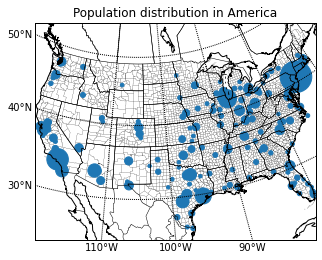

In [4]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# 繪製基本地圖，選擇繪製的區域，由於繪製美國地圖，故選取如下經緯度，lat_0 和 lon_0 是地圖中心的緯度和經度
# 地圖圖片大小寬度　llcrnrlat=23.41 ,urcrnrlat=45.44
# 地圖大小縱度　llcrnrlon=-118.67,urcrnrlon=-64.52

map = Basemap(projection='stere',lat_0=90,lon_0=-105,\
            llcrnrlat=23.41 ,urcrnrlat=45.44,\
            llcrnrlon=-118.67,urcrnrlon=-64.52,\
            rsphere=6371200.,resolution='l',area_thresh=10000)

map.drawmapboundary()   # 繪製邊界
map.drawstates()        # 繪製州
map.drawcoastlines()    # 繪製海岸線
map.drawcountries()     # 繪製國家
map.drawcounties()      # 繪製縣

parallels = np.arange(0.,90,10.) 
map.drawparallels(parallels,labels=[1,0,0,0],fontsize=10) # 繪製緯線

meridians = np.arange(-110.,-60.,10.)
map.drawmeridians(meridians,labels=[0,0,0,1],fontsize=10) # 繪製經線


posi=pd.read_csv("2014_us_cities.csv") # 讀取數據
#取得資料集資訊
posi.info()
posi.head()

# 原始資料有3228組資料，選擇了280個城市的資料
lat = np.array(posi["lat"][0:280]) # 獲取維度之維度值
lon = np.array(posi["lon"][0:280]) # 獲取經度值
pop = np.array(posi["pop"][0:280],dtype=float)  # 獲取人口數，轉化為numpy浮點型

size=(pop/np.max(pop))*1000 # 繪製散點圖時圖形的大小，如果之前pop不轉換為浮點型會沒有大小不一的效果
x,y = map(lon,lat)

map.scatter(x,y,s=size)     # 也可以使用Basemap的methord本身的scatter
plt.title('Population distribution in America')
plt.show()

#由圖可以直觀看出紐約、三藩市、芝加哥、華盛頓是美國人口數量最多的城市。


enter reference longitude (lon_0):70


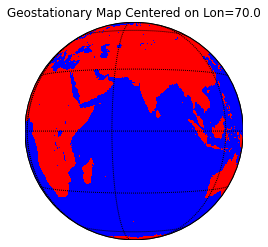

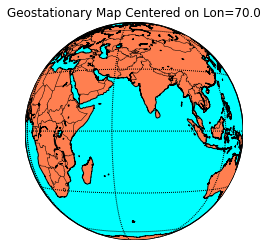

In [5]:
from __future__ import (absolute_import, division, print_function)

from mpl_toolkits.basemap import Basemap
import numpy as np
import matplotlib.pyplot as plt
import sys

def get_input(prompt):
    if sys.hexversion > 0x03000000:
        return input(prompt)
    else:
        return raw_input(prompt)

# 為地球靜止(衛星視圖)投影創建底圖實例。
lon_0 = float(get_input('enter reference longitude (lon_0):'))

#繪製有陸地/海面遮罩的地圖。
fig=plt.figure()
m = Basemap(projection='geos',lon_0=lon_0,rsphere=(6378137.00,6356752.3142),resolution=None)
# 繪製 land-sea 遮罩, 顏色: land red, oceans blue.
# lakes=True: 表示真實塗色, 給定 ocean color.
m.drawlsmask(land_color='red',ocean_color='blue',lakes=True)
# 繪製經緯度
m.drawparallels(np.arange(-90.,120.,30.))
m.drawmeridians(np.arange(0.,420.,60.))
m.drawmapboundary()
plt.title('Geostationary Map Centered on Lon=%s' % (lon_0))

# 會至第貳個地圖
# 繪製和填充大陸的地圖。
fig = plt.figure()
m = Basemap(projection='geos',lon_0=lon_0,rsphere=(6378137.00,6356752.3142),resolution='l')
m.drawcoastlines()
m.fillcontinents(color='coral',lake_color='aqua')
m.drawmapboundary(fill_color='aqua')
m.drawcountries()
# 繪製經緯度
m.drawparallels(np.arange(-90.,120.,30.))
m.drawmeridians(np.arange(0.,420.,60.))
plt.title('Geostationary Map Centered on Lon=%s' % (lon_0))
plt.show()

In [10]:
from mpl_toolkits.basemap import Basemap, cm
# cm(colormap)庫提供一系列彩色地圖
from netCDF4 import Dataset as NetCDFFile
import numpy as np
import matplotlib.pyplot as plt
#同上文，導入numpy, matplotlib.pyplot，導入netCDF4中的Dataset處理網路通用
#資料格式（net common data form）

nc = NetCDFFile('nws_precip_conus_20061222.nc')
#首先在http://water.weather.gov/precip/中下載2006年12月22日的美國本土
#（不含阿拉斯加與夏威夷）的降水量數據
#導入我們需要用到的dataset， 值得注意的是該網站17年3月後的資料格式更新， 
#通過查詢變數名發現資料格式與之前有很大差異
print(nc.variables.keys())
# 輸出查看資料中的變數名
# 取得變數的值, 並放入陣列
prcpvar = nc.variables['amountofprecip']
data = 0.01*prcpvar[:]
latcorners = nc.variables['lat'][:]
loncorners = -nc.variables['lon'][:]
lon_0 = -nc.variables['true_lon'].getValue()
lat_0 = nc.variables['true_lat'].getValue()


# 標準化降水量與提取經緯度參數
fig = plt.figure(figsize=(8,8))
ax = fig.add_axes([0.1,0.1,0.8,0.8])

#創建圖像物件，設置圖像大小與軸線起始位置 
# create polar stereographic Basemap instance.
m = Basemap(projection='stere',lon_0=lon_0,lat_0=90.,lat_ts=lat_0,\
            llcrnrlat=latcorners[0],urcrnrlat=latcorners[2],\
            llcrnrlon=loncorners[0],urcrnrlon=loncorners[2],\
            rsphere=6371200.,resolution='l',area_thresh=10000)

#畫立體投影圖， 設置圖形上下左右四個邊界點經緯度參數座標，中心點經緯度參
#數座標,定義地圖投影的球面半徑(預設值為6370997米，近似於地球的半徑），
#解析度以及閾值 
# 注: area_thresh = 10000 意味著面積小於10000平方公里的湖泊等對象將不被作圖
m.drawcoastlines()
m.drawstates()
m.drawcountries()
# 畫海岸線，州界， 國界線
parallels = np.arange(0.,90,10.)
m.drawparallels(parallels,labels=[1,0,0,0],fontsize=10)
#以10度為間隔畫出0度到北緯90度緯線， 並且在圖像左側設置緯線標籤
meridians = np.arange(180.,360.,10.)
#以10度為間隔畫出西經180度到本初子午線經線， 並且在圖像下側設置經線標籤
m.drawmeridians(meridians,labels=[0,0,0,1],fontsize=10)
ny = data.shape[0]; nx = data.shape[1]
lons, lats = m.makegrid(nx, ny)
# 經緯線空間均勻
x, y = m(lons, lats) 
clevs = [0,1,2.5,5,7.5,10,15,20,30,40,50,70,100,150,200,250,300,400,500,600,750]
cs = m.contourf(x,y,data,clevs,cmap=cm.s3pcpn)
# 添加參數表，以x,y為基準畫出data的輪廓線，等輪廓線參數為clevs，填充顏色畫出填充後的輪廓線
cbar = m.colorbar(cs,location='bottom',pad="5%")
#添加色標, 每個色標占5%（一共20個色標）
cbar.set_label('mm')
# 添加標籤 單位：毫米
plt.title(prcpvar.long_name+' for period ending '+prcpvar.dateofdata)
# 添加圖像名
plt.show()
plt.savefig('24hrs rainfall of 20061222 for CONUS.jpg')


odict_keys(['time', 'crs', 'observation', 'normal', 'departure_from_normal', 'percent_of_normal', 'x', 'y'])


KeyError: 'amountofprecip'